<a href="https://colab.research.google.com/github/Wilkingc/Forecasting-Post-Fire-Debris-Flow/blob/main/30minutes__GNBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GNBayes

## Imports


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url =  ('/content/drive/MyDrive/Flood Capstone/USGS_Logistic_Regression_DS.xlsx')
data = pd.read_excel(url, sheet_name = 1)

## Read in the data



Notice that the data set does not have column names.  So, we will create our own and include them when we create the data frame.


In [ ]:
clime = data.copy()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
clime.head()

,Fire Name,Year,Fire_ID,Fire_SegID,Database,State,UTM_Zone,UTM_X,UTM_Y,Response,StormDate,GaugeDist_m,StormStart,StormEnd,StormDur_H,StormAccum_mm,StormAvgI_mm/h,Peak_I15_mm/h,Peak_I30_mm/h,Peak_I60_mm/h,ContributingArea_km2,PropHM23,dNBR/1000,KF,Acc015_mm,Acc030_mm,Acc060_mm
0,Buckweed,2007,bck,bck_1035,Training,CA,11,368133.5165,3823231.989,0,2008-01-22 00:00:00,1998.67,2008-01-21 16:27:00,2008-01-22 19:20:00,26.883,5.4,0.20,3.2,2.0,2.0,0.378767,0.217933,0.297853,0.250000,0.8,1.0,2.0
1,Buckweed,2007,bck,bck_1090,Training,CA,11,367871.0165,3822984.489,0,2008-01-22 00:00:00,2368.93,2008-01-21 16:27:00,2008-01-22 19:20:00,26.883,5.4,0.20,3.2,2.0,2.0,0.689615,0.061249,0.224896,0.250000,0.8,1.0,2.0
2,Buckweed,2007,bck,bck_1570,Training,CA,11,367503.5165,3821741.989,0,2008-01-22 00:00:00,3956.74,2008-01-21 16:27:00,2008-01-22 19:20:00,26.883,5.4,0.20,3.2,2.0,2.0,2.757312,0.042968,0.065537,0.248541,0.8,1.0,2.0
3,Buckweed,2007,bck,bck_235,Training,CA,11,371108.5165,3824991.989,0,2008-01-22 00:00:00,1734.72,2008-01-21 15:47:00,2008-01-22 19:39:00,27.883,3.0,0.11,1.6,1.2,0.8,0.613415,0.092164,0.141711,0.250000,0.4,0.6,0.8
4,Buckweed,2007,bck,bck_363,Training,CA,11,370763.5165,3824576.989,0,2008-01-22 00:00:00,1801.04,2008-01-21 15:47:00,2008-01-22 19:39:00,27.883,3.0,0.11,1.6,1.2,0.8,0.538875,0.058353,0.210158,0.250000,0.4,0.6,0.8


In [ ]:
clime.shape

(1550, 27)

In [ ]:
clime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fire Name             1550 non-null   object        
 1   Year                  1550 non-null   int64         
 2   Fire_ID               1550 non-null   object        
 3   Fire_SegID            1550 non-null   object        
 4   Database              1550 non-null   object        
 5   State                 1550 non-null   object        
 6   UTM_Zone              1550 non-null   int64         
 7   UTM_X                 1550 non-null   float64       
 8   UTM_Y                 1550 non-null   float64       
 9   Response              1550 non-null   int64         
 10  StormDate             1550 non-null   object        
 11  GaugeDist_m           1550 non-null   float64       
 12  StormStart            1390 non-null   datetime64[ns]
 13  StormEnd          

In [ ]:
clime = clime.drop(['Fire Name','Fire_ID','Fire_SegID','Database','State','StormDate','StormStart','StormEnd','UTM_X','UTM_Y','Peak_I15_mm/h','Peak_I60_mm/h','Acc015_mm','Acc060_mm'], axis = 1 )

In [ ]:
clime.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1550.0,2006.933548,3.466538,2000.000000,2003.000000,2009.000000,2009.000000,2012.000000
UTM_Zone,1550.0,11.616129,0.836003,11.000000,11.000000,11.000000,12.000000,13.000000
Response,1550.0,0.215484,0.411290,0.000000,0.000000,0.000000,0.000000,1.000000
GaugeDist_m,1550.0,1958.996196,1071.810282,27.843965,1037.460000,1913.675000,2811.027500,3999.300000
StormDur_H,1550.0,18.446009,18.507975,0.000000,2.000000,14.300000,27.137500,65.000000
StormAccum_mm,1550.0,34.971515,38.374910,0.000000,8.380000,22.000000,51.200000,222.250000
StormAvgI_mm/h,1550.0,4.877449,9.364335,0.000000,0.615758,1.960000,4.237463,58.670143
Peak_I30_mm/h,1336.0,16.977987,14.776918,1.200000,8.128000,12.000000,20.500000,80.000000
ContributingArea_km2,1550.0,1.047743,1.537803,0.020100,0.108485,0.435986,1.308229,7.888105
PropHM23,1550.0,0.478713,0.276017,0.000000,0.233447,0.523288,0.692406,0.989526


In [ ]:
clime['Response'].value_counts( dropna = False)


,count
Response,
0,1216
1,334


In [ ]:
clime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  1550 non-null   int64  
 1   UTM_Zone              1550 non-null   int64  
 2   Response              1550 non-null   int64  
 3   GaugeDist_m           1550 non-null   float64
 4   StormDur_H            1550 non-null   float64
 5   StormAccum_mm         1550 non-null   float64
 6   StormAvgI_mm/h        1550 non-null   float64
 7   Peak_I30_mm/h         1336 non-null   float64
 8   ContributingArea_km2  1550 non-null   float64
 9   PropHM23              1550 non-null   float64
 10  dNBR/1000             1473 non-null   float64
 11  KF                    1550 non-null   float64
 12  Acc030_mm             1336 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 157.5 KB


In [ ]:
def fill_nulls_with_mean(df):
  """
  Replaces null values in a DataFrame with the mean of each column.

  Args:
    df: The pandas DataFrame to process.

  Returns:
    A DataFrame with null values replaced by column means.
  """

  for column in df.columns:
    column_mean = df[column].mean()
    df[column].fillna(column_mean, inplace=True)

  return df


In [ ]:
pima = fill_nulls_with_mean(clime)

<ipython-input-13-22b674667130>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(column_mean, inplace=True)


In [ ]:
clime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  1550 non-null   int64  
 1   UTM_Zone              1550 non-null   int64  
 2   Response              1550 non-null   int64  
 3   GaugeDist_m           1550 non-null   float64
 4   StormDur_H            1550 non-null   float64
 5   StormAccum_mm         1550 non-null   float64
 6   StormAvgI_mm/h        1550 non-null   float64
 7   Peak_I30_mm/h         1550 non-null   float64
 8   ContributingArea_km2  1550 non-null   float64
 9   PropHM23              1550 non-null   float64
 10  dNBR/1000             1550 non-null   float64
 11  KF                    1550 non-null   float64
 12  Acc030_mm             1550 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 157.5 KB


In [ ]:
X = clime.drop('Response',axis=1).copy()
y = clime['Response'].copy()

## EDA

### Correlation matrix plot

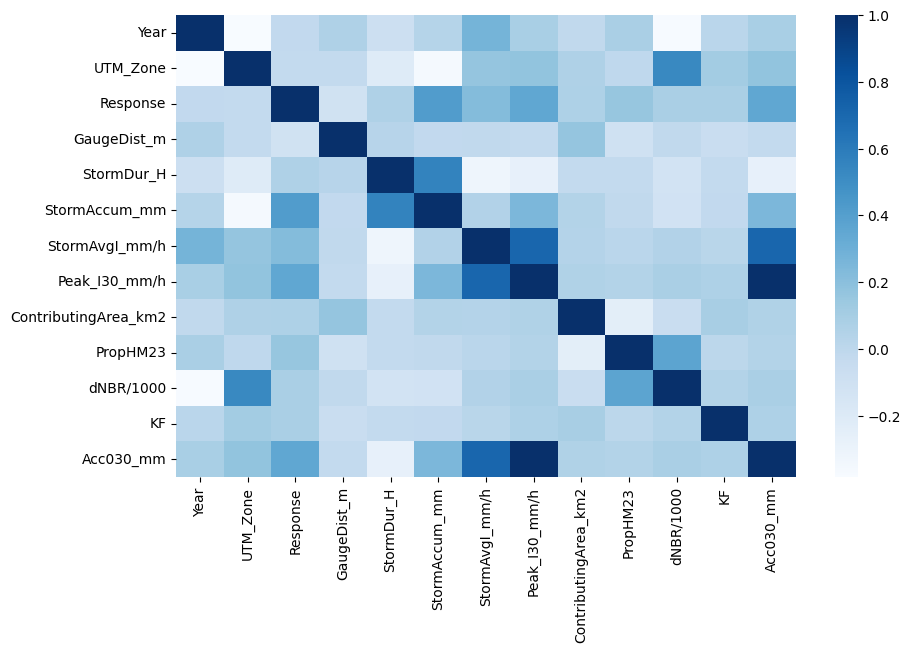

In [ ]:
corr = clime.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='Blues',annot = False);

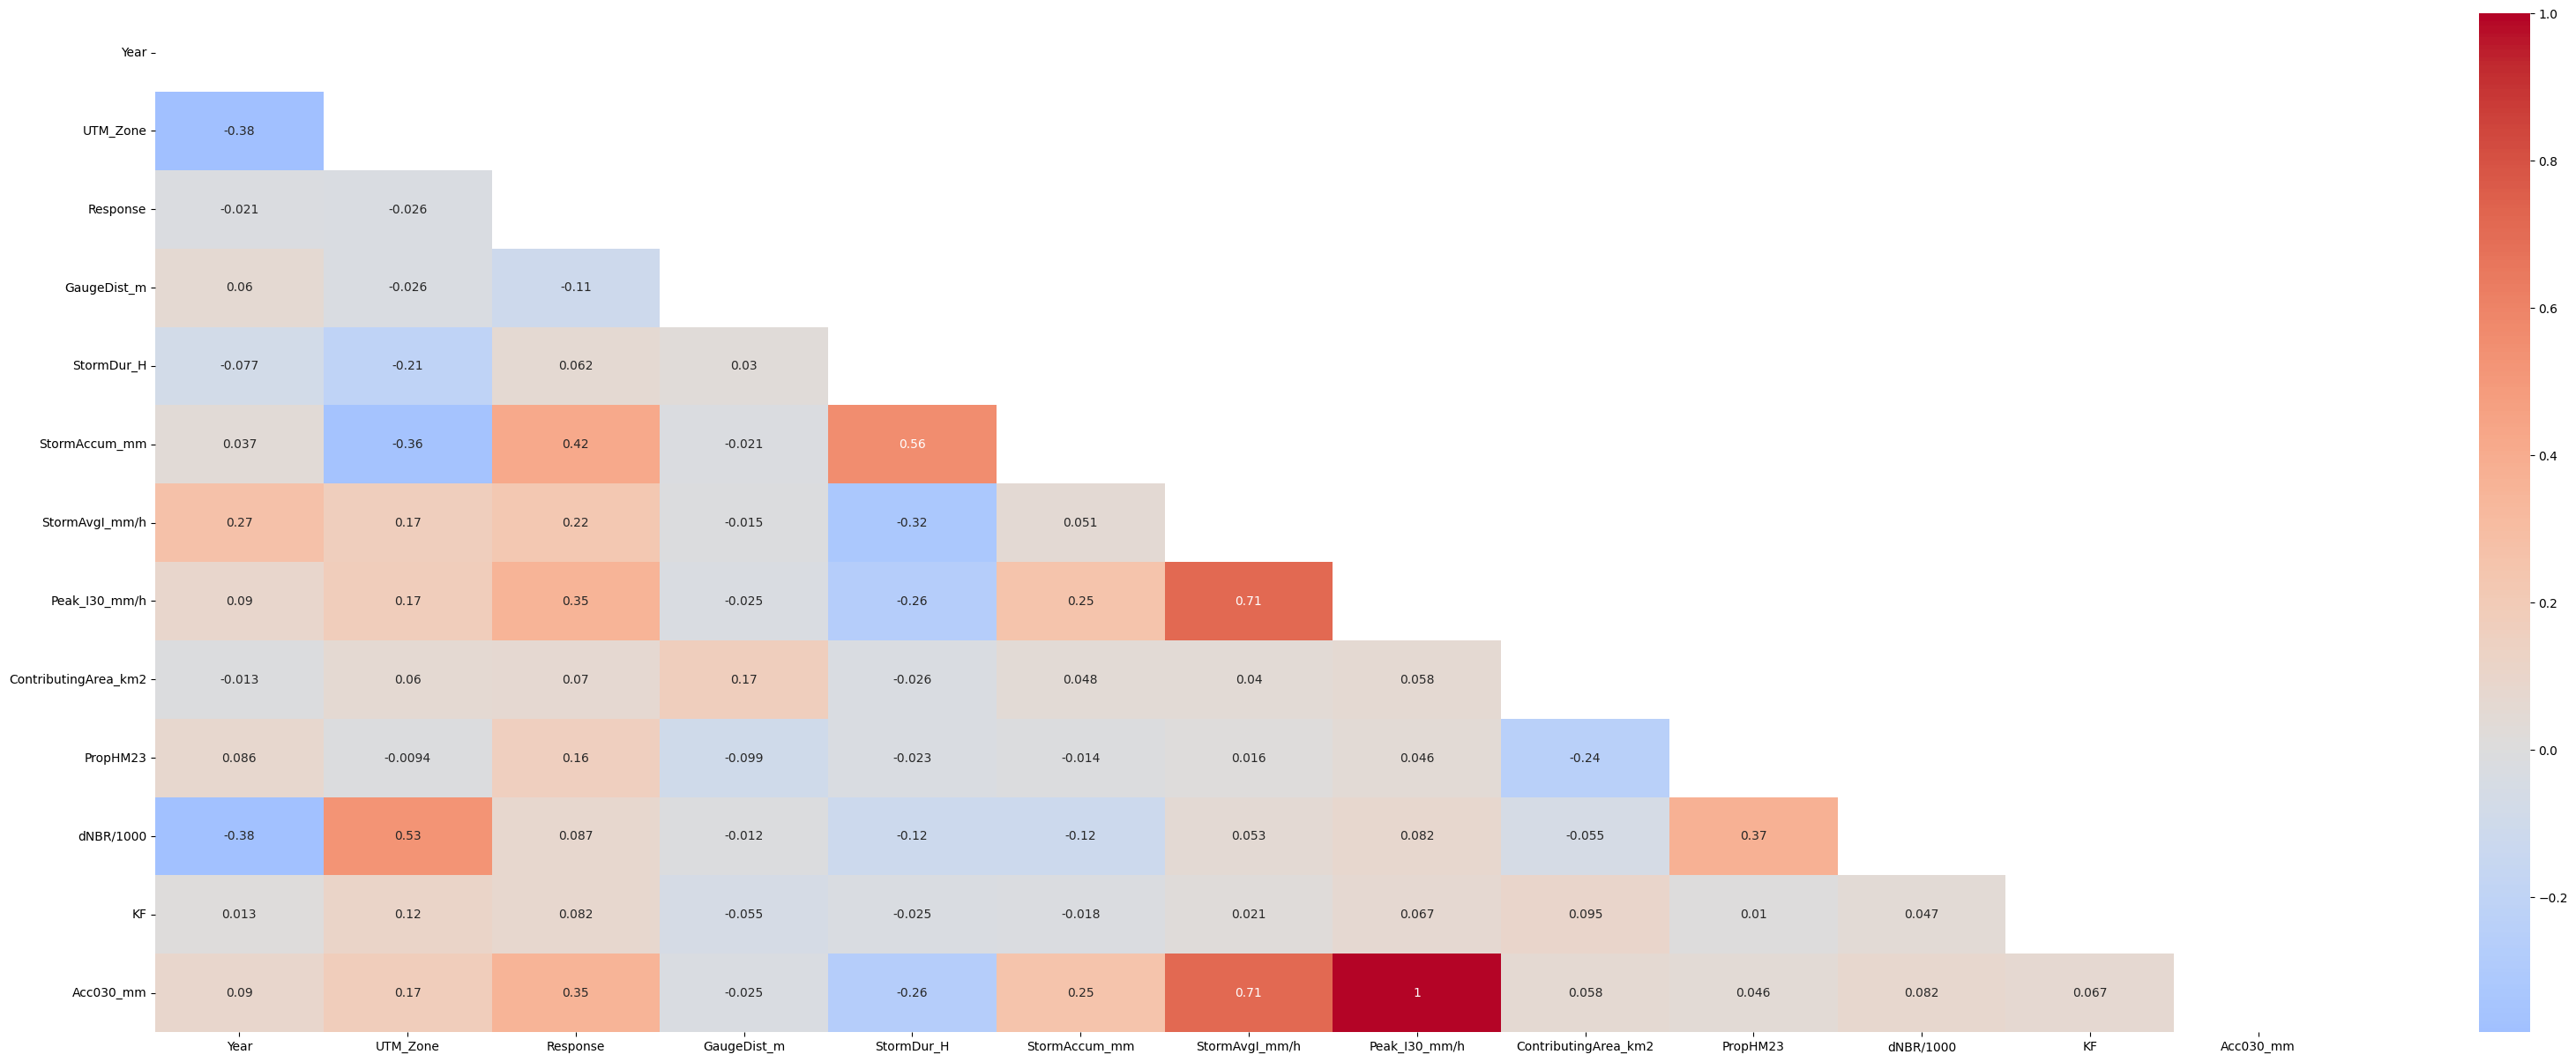

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(40, 15))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0)
plt.show()

In [ ]:
corr_unstacked = corr.unstack()
corr_unstacked

Year       Year                    1.000000
           UTM_Zone               -0.383274
           Response               -0.020740
           GaugeDist_m             0.059865
           StormDur_H             -0.077234
                                     ...   
Acc030_mm  ContributingArea_km2    0.057559
           PropHM23                0.046114
           dNBR/1000               0.082017
           KF                      0.067302
           Acc030_mm               1.000000
Length: 169, dtype: float64

In [ ]:
corr = clime.corr().abs()
corr = corr.melt(
    ignore_index = False,
    var_name = 'feature',
    value_name = 'correlation',
    )
corr = corr[corr['correlation'] != 1]
corr.sort_values(
    'correlation',
    inplace=True,
    ascending=False,
    )
corr[::2].head(5)

,feature,correlation
Acc030_mm,StormAvgI_mm/h,0.710845
Peak_I30_mm/h,StormAvgI_mm/h,0.710845
StormDur_H,StormAccum_mm,0.558237
UTM_Zone,dNBR/1000,0.525684
Response,StormAccum_mm,0.417438


### Feature distributions

## Fit GNBayes

### Cross validation

In [ ]:
gnb = GaussianNB()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

# print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}"

Number of mislabeled points out of a total 310 points : 65


In [ ]:
1-3283/36000

0.9088055555555555

In [ ]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [ ]:
accuracy_scores = cross_validate(X, y, 10)
print(round(accuracy_scores.mean(), 5))

0.81968


### Confusion matrix

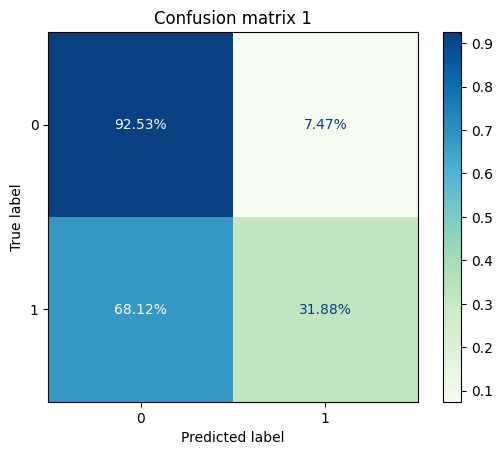

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix 1') ;
plt.savefig('confusion_M.png')

We are often predicting that someone does not have diabetes even if they do. What can we do to combat this?

### Balance classes

In [ ]:
# Let's balance our classes
clime_balanced = clime.groupby('Response').sample(n = 334, replace = False)

In [ ]:
clime_balanced['Response'].value_counts( dropna = False)

,count
Response,
0,334
1,334


In [ ]:
C = clime_balanced['Response'].copy()
D = clime_balanced.drop('Response',axis=1).copy()

### Cross validation

In [ ]:
def cross_validate(x, Y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    C_train, D_test, y_train, y_test = model_selection.train_test_split(D, C, test_size = 0.2)
    model_split_cv.fit(C_train, y_train)
    y_split_pred = model_split_cv.predict(D_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [ ]:
accuracy = cross_validate(C, D, 500)
print(round(accuracy_scores.mean(), 3))

0.82


In [ ]:
C_train, D_test, y_train, y_test = train_test_split(D, C, test_size=0.20, random_state=0)
gnb.fit(C_train, y_train)
y_pred = gnb.predict(D_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (D_test.shape[0], (y_test != y_pred).sum()))

# print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}"

Number of mislabeled points out of a total 134 points : 48


### Confusion matrix

Let's look at the confusion matrix using the last validation run


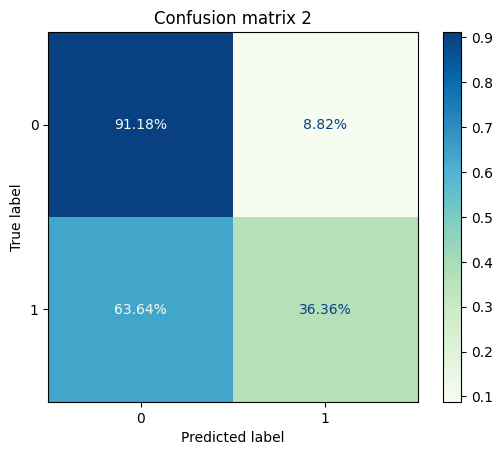

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    D_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix 2') ;
plt.savefig('confusion_matrix.png')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.91      0.72        68
           1       0.80      0.36      0.50        66

    accuracy                           0.64       134
   macro avg       0.70      0.64      0.61       134
weighted avg       0.70      0.64      0.61       134



In [ ]:
predict_accuracy = metrics.accuracy_score( y_test, y_pred )
predict_f1 = metrics.f1_score( y_test, y_pred )

print(f"Mean Accuracy: {predict_accuracy*100:.1f}%")
print(f"F1 Score: {predict_f1*100:.1f}%")

Mean Accuracy: 64.2%
F1 Score: 50.0%


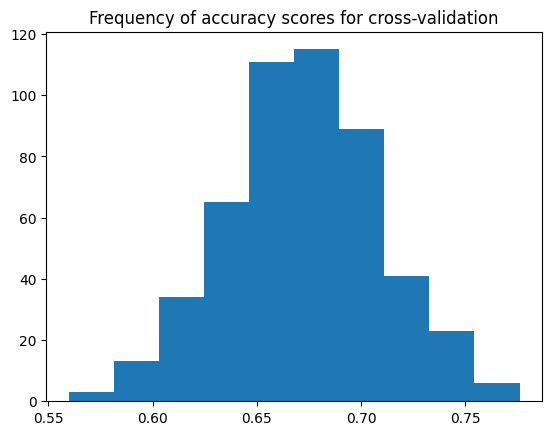

In [ ]:
plt.hist(accuracy)
plt.title('Frequency of accuracy scores for cross-validation for 30 min')
plt.show()